In [2]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,MaxPooling2D,Dense,Flatten
from keras import backend as K
from keras.layers import BatchNormalization,Activation,SeparableConv2D
from keras import regularizers
import matplotlib.pyplot as plt
import keras.backend  as K
from pathlib import Path
from keras.models import load_model
from keras.callbacks import Callback


Using TensorFlow backend.


In [3]:
num_classes=10
epoch=50
batch_size=64
img_row,img_col=28,28
from keras.datasets import mnist
(feature_train,label_train),(feature_test,label_test) =mnist.load_data()

11493376/11490434 [==============================] - 6s 0us/step


In [0]:
if K.image_data_format() == "channels_first":
  input_img_shape = (1,img_row , img_col)
else:
  input_img_shape = (img_row,img_col,1)
  
  
feature_train = feature_train.reshape(feature_train.shape[0],*input_img_shape)
feature_test = feature_test.reshape(feature_test.shape[0],*input_img_shape)


In [0]:
feature_train = feature_train.astype(np.float16)
feature_train /= 255
feature_test = feature_test.astype(np.float16)
feature_test/=255

In [0]:
label_train = keras.utils.to_categorical(label_train,num_classes)
label_test = keras.utils.to_categorical(label_test,num_classes)

In [7]:
feature_train.shape

(60000, 28, 28, 1)

In [0]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3) ,input_shape=input_img_shape ,use_bias=False))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D())

classifier.add(SeparableConv2D(64,(3,3),use_bias=False))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))


classifier.add(Conv2D(32,(1,1),use_bias=False))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))



classifier.add(SeparableConv2D(16,(3,3),use_bias=False))
classifier.add(BatchNormalization())
classifier.add(Activation("relu"))
classifier.add(MaxPooling2D())

classifier.add(Dense(40 , activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(num_classes))
classifier.add(Activation("softmax"))

classifier.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

In [9]:
# Upload all the three files utils.py LrFinder.py OneCyclePolicy.py
from google.colab import files
uploaded = files.upload()
!ls


Saving LrFinder.py to LrFinder.py
Saving OneCyclePolicy.py to OneCyclePolicy.py
Saving utils.py to utils.py
LrFinder.py  OneCyclePolicy.py	sample_data  utils.py


Epoch 1/2
60000/60000 [==============================] - 20s 335us/step - loss: 1.8914 - acc: 0.3822


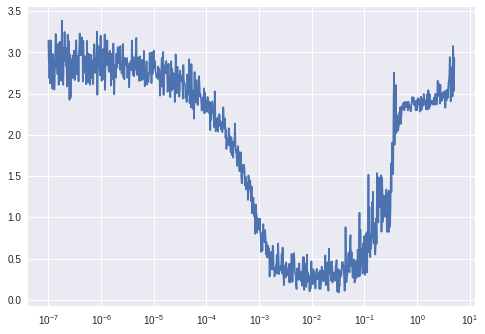

In [10]:
from utils import stepper , annealing_linear,annealing_cos
from LrFinder import LRFinder

lrfind = LRFinder(len(feature_train)//batch_size )
history = classifier.fit(feature_train,label_train ,epochs=2,batch_size=batch_size,shuffle=True ,callbacks=[lrfind] )


In [11]:
#so our max_lr be 2e-3
from OneCyclePolicy import OneCycleScheduler

fit_one_cycle = OneCycleScheduler(num_iteration = len(feature_train)//batch_size  , num_epochs =4 , max_lr = 2e-3)
his = classifier.fit(feature_train,label_train ,epochs=4,batch_size=batch_size,shuffle=True ,callbacks=[fit_one_cycle] ,validation_data=(feature_test,label_test)  )

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 18s 304us/step - loss: 0.5952 - acc: 0.8095 - val_loss: 1.2950 - val_acc: 0.4637
Epoch 2/4
60000/60000 [==============================] - 18s 303us/step - loss: 0.0978 - acc: 0.9693 - val_loss: 0.0512 - val_acc: 0.9834
Epoch 3/4
60000/60000 [==============================] - 18s 304us/step - loss: 0.0655 - acc: 0.9797 - val_loss: 0.0312 - val_acc: 0.9898
Epoch 4/4
60000/60000 [==============================] - 18s 301us/step - loss: 0.0482 - acc: 0.9850 - val_loss: 0.0257 - val_acc: 0.9918
